In [1]:
#General Imports
import os 
import sys
from dotenv import load_dotenv #importing env file
import pandas as pd
import random
import pickle



In [2]:
#ML Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
#NLP
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [4]:
train_path = '/Users/vishesh/projects/Pricer/data/balanced/train.pkl'
test_path = '/Users/vishesh/projects/Pricer/data/balanced/test.pkl'
with open(train_path,'rb') as f:
    train = pickle.load(f)
with open(test_path,'rb') as f:
    test = pickle.load(f)

In [5]:
print(train['title'].iloc[232344])

Starfilm Screen Protector For Thinkpad X1 Yoga Gen6/2021 Touch Screen Laptop 14Inch Draw&Write Like Paper Screen Protector (14inch 16:10 draw like paper)


In [6]:

print(train['prompt'].iloc[3])
print(test['test_prompt'].iloc[3])

How much does this cost to the nearest dollar?

Upgraded Charging Dock with LED Light for Oculus Quest Station with 2 Rechargeable Batteries for Meta Oculus Quest 2 Accessories,Headset Display Stand and Controller Mount,Magnetic Cable
Magetic Charing Station for OCULUS QUEST 2 Charging Dock Built to charge the Oculus Quest 2, the Elite Strap, VR headset and two Touch Controllers simultaneously. Lightning Speed Charge Great for Elite Gamer This charger dock for valve index allows you to fully charge up the both controllers within 4 hours, and fully charge up VR headset with 3.5 hours. There are 3 USB-A ports on the dock meet your needs to charge other devices at the same time. Save Energy and More Environmentally Rechargeable batteries and controller cover help to save you from the endless cycle of replacements. Space Neat and Easy Get for Oculus quest 2 accessories VR stand stores your VR headset and controllers in

Price is $45.00
How much does this cost to the nearest dollar?

Vangoa

## TESTER CLASS

In [7]:
import math 

In [23]:
# COLOR MAP
GREEN = "\033[92m"
ORANGE = "\033[93m"
RED = "\033[91m"
RESET = "\033[0m"
COLOR_MAP = {"red":RED, "orange": ORANGE, "green": GREEN}
class Tester :

    def __init__(self,predictor , title=None , data=test , size = 250):
        self.predictor = predictor 
        self.data = data 
        self.title = title or predictor.__name__.replace("_"," ").title()
        self.size = size 
        self.guesses = []
        self.truths = []
        self.errors = []
        self.lche = []
        self.relative_errors = []
        self.colors = []

    def run_datapoint(self , i):
        datapoint = self.data.iloc[i]

        guess = float(self.predictor(datapoint)) #predicted output
        truth = float(datapoint['price'])

        error = abs(truth - guess)
        relative_errror = abs((error)/truth)
        log_cosh_error = self.safe_log_cosh(error)

        color = self.color_for(error , truth) #for better outputs
        title = datapoint['title'] if len(datapoint['title']) <= 40 else datapoint['title'][:40] + '...'
        
        self.guesses.append(guess)
        self.truths.append(truth)
        self.relative_errors.append(relative_errror)
        self.errors.append(error)
        self.colors.append(color)
        self.lche.append(log_cosh_error)

        print(f"{COLOR_MAP[color]}{i+1}: Guess: ${guess:,.2f} Truth: ${truth:,.2f} Error: ${error:,.2f}  Relative:${relative_errror:,.2f} Item: {title}{RESET}")
    
    def safe_log_cosh(self,x):
        """avoids overflow"""
        x = max(min(x, 500), -500)  # Cap between -500 and 500
        return math.log(math.cosh(x))
    def color_for(self , error , truth):
        if error < 0.4 or error/truth < 0.2:
            return 'green'
        elif error < 0.8 or error/truth < 0.4:
            return 'orange'
        else :
            return 'red'
        
    def chart(self,title):
        max_error = max(self.errors)
        plt.figure(figsize=(12,8))
        max_val = max(max(self.truths),max(self.guesses))
        plt.plot([0,max_val],[0,max_val],color='skyblue' , lw=2 , alpha=0.6)
        plt.scatter(self.truths,self.guesses,s=3,c=self.colors)
        plt.xlabel('True Values')
        plt.ylabel('Guess Values by Model')
        plt.xlim(0,max_val)
        plt.ylim(0,max_val)
        plt.title(title)
        plt.show()
    
    def report(self):
        average_error = sum(self.errors) / self.size 
        relative_error = sum(self.relative_errors) /self.size
        bang_on = sum(1 for color in self.colors if color =='green')
        title = f"{self.title} Error=${average_error:,.2f}  Percentage_Error={relative_error*100:,.2f}%  bang_on={bang_on/self.size*100:.1f}%"
        self.chart(title)
    
    def run (self):
        self.error = 0 
        for i in range (self.size):
            self.run_datapoint(i)
        self.report()
    
    @classmethod
    def test(cls , function):
        cls(function).run()


### Basic testing

1: Guess: $655.00 Truth: $899.95 Error: $244.95  Relative:$0.27 Item: ZLINE 30 in. Wooden Wall Mount Range Hoo...
2: Guess: $115.00 Truth: $3.40 Error: $111.60  Relative:$32.82 Item: Rise of Nations Rise of Legends
3: Guess: $26.00 Truth: $11.99 Error: $14.01  Relative:$1.17 Item: Anti Vibration Pads for Washing Machine ...
4: Guess: $760.00 Truth: $69.99 Error: $690.01  Relative:$9.86 Item: Vangoa Snare Drum Kit, Marching Snare Dr...
5: Guess: $282.00 Truth: $45.99 Error: $236.01  Relative:$5.13 Item: BaoFeng Walkie Talkies for Adults Long R...
6: Guess: $251.00 Truth: $104.99 Error: $146.01  Relative:$1.39 Item: Auto Ventshade [AVS] Aeroskin Hood Prote...
7: Guess: $229.00 Truth: $375.40 Error: $146.40  Relative:$0.39 Item: LEGO Star Wars Darth Vader's TIE Fighter...
8: Guess: $143.00 Truth: $21.96 Error: $121.04  Relative:$5.51 Item: PDP Rock Candy Gesture Controller for Wi...
9: Guess: $755.00 Truth: $25.95 Error: $729.05  Relative:$28.09 Item: Decalrus - Protective Decal for Acer 

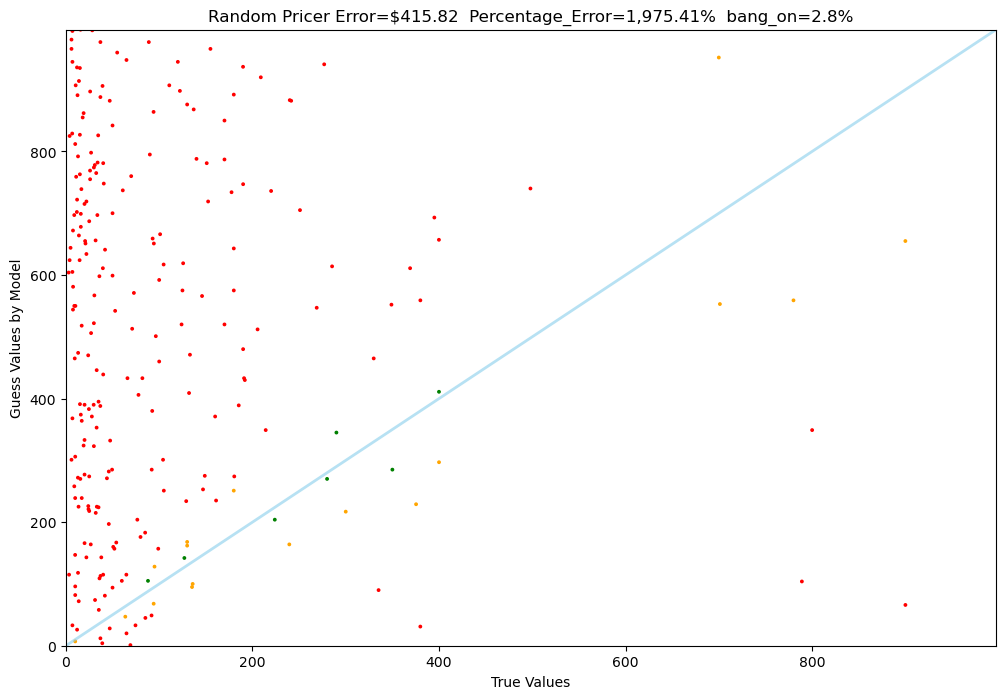

In [24]:
random.seed(42)

# 2. Define any predictor function
def random_pricer(item):
    return random.randrange(1, 1000)

# 3. Test any function
Tester.test(random_pricer)



In [ ]:
prices = test['price'].to_list()

avg_price = sum(prices) / len(prices)
def average_pricer(item):
    return avg_price

results = tester.test_function(average_pricer , num_samples=500)